In [136]:
from sklearn.datasets import load_digits
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
import pandas as pd
from sklearn import neighbors, datasets, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageDraw
from math import sqrt
from sklearn.metrics import mean_squared_error

In [147]:



#ファイルを読み込む。
#周波数全て利用(1.2~2THzまで0.01THzごとに)
def allread():
    ######変更
    train_x = np.empty((0,11), int)
    test_x = np.empty((0,11), int)
    x_all = np.empty((0,11), int)
    ######
    thickness = 0.5
    train_y= []
    test_y = []
    y_all = []
    for i in range(0,4):
        ######変更
        df = pd.read_csv('/Users/ryoya/kawaseken/PE_zink/EMS_min_max_normalization/PE_zink_{}mm.csv'.format(thickness))
        ######
        train_x_list= []
        #まずは訓練データの選定（今回はサンプル1を訓練データとして利用)
        for j in df['1']:
            train_x_list.append(j)
        train_x= np.append(train_x, np.array([train_x_list]), axis=0)
        x_all= np.append(x_all, np.array([train_x_list]), axis=0)
        train_y.append('{}mm'.format(thickness))
        y_all.append('{}mm'.format(thickness))
        #次にテストデータ
        test_x_list_2= []
        test_x_list_3= []
        test_x_list_4= []
        test_x_list_5= []
        test_x_list_6= []
        for j,k,l,m,n in zip(df['2'],df['3'],df['4'],df['5'],df['6']):
            test_x_list_2.append(j)
            test_x_list_3.append(k)
            test_x_list_4.append(l)
            test_x_list_5.append(m)
            test_x_list_6.append(n)
        for j in range(0,5):
            test_y.append('{}mm'.format(thickness))
            y_all.append('{}mm'.format(thickness))
        test_x= np.append(test_x, np.array([test_x_list_2]), axis=0)
        test_x= np.append(test_x, np.array([test_x_list_3]), axis=0)
        test_x= np.append(test_x, np.array([test_x_list_4]), axis=0)
        test_x= np.append(test_x, np.array([test_x_list_5]), axis=0)
        test_x= np.append(test_x, np.array([test_x_list_6]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_2]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_3]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_4]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_5]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_6]), axis=0)
      
        thickness += 0.5
    return train_x,train_y,test_x,test_y,x_all,y_all

def allread_regression():
    ######変更
    train_x = np.empty((0,11), int)
    test_x = np.empty((0,11), int)
    x_all = np.empty((0,11), int)
    ######
    thickness = 0.5
    train_y= []
    test_y = []
    y_all = []
    for i in range(0,4):
        ######変更
        df = pd.read_csv('/Users/ryoya/kawaseken/PE_zink/EMS_min_max_normalization/PE_zink_{}mm.csv'.format(thickness))
        ######
        train_x_list= []
        #まずは訓練データの選定（今回はサンプル1を訓練データとして利用)
        for j in df['1']:
            train_x_list.append(j)
        train_x= np.append(train_x, np.array([train_x_list]), axis=0)
        x_all= np.append(x_all, np.array([train_x_list]), axis=0)
        train_y.append(thickness)
        y_all.append(thickness)
        #次にテストデータ
        test_x_list_2= []
        test_x_list_3= []
        test_x_list_4= []
        test_x_list_5= []
        test_x_list_6= []
        for j,k,l,m,n in zip(df['2'],df['3'],df['4'],df['5'],df['6']):
            test_x_list_2.append(j)
            test_x_list_3.append(k)
            test_x_list_4.append(l)
            test_x_list_5.append(m)
            test_x_list_6.append(n)
        for j in range(0,5):
            test_y.append(thickness)
            y_all.append(thickness)
        test_x= np.append(test_x, np.array([test_x_list_2]), axis=0)
        test_x= np.append(test_x, np.array([test_x_list_3]), axis=0)
        test_x= np.append(test_x, np.array([test_x_list_4]), axis=0)
        test_x= np.append(test_x, np.array([test_x_list_5]), axis=0)
        test_x= np.append(test_x, np.array([test_x_list_6]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_2]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_3]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_4]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_5]), axis=0)
        x_all= np.append(x_all, np.array([test_x_list_6]), axis=0)
      
        thickness += 0.5
    return train_x,train_y,test_x,test_y,x_all,y_all
        
#周波数5点を選定        
def fiveread(train_num):
    train_x = np.empty((0,5), int)
    test_x = np.empty((0,5), int)
    x_all = np.empty((0,5), int)
    thickness = 0.5
    train_y= []
    test_y = []
    y_all = []
    for i in range(0,4):
        ######変更
        df = pd.read_csv('/Users/ryoya/kawaseken/PE_zink/EMS_min_max_normalization/PE_zink_{}mm.csv'.format(thickness))
        ######
        train_x_list= []
        #まずは訓練データの選定（今回はサンプル1を訓練データとして利用)
        #print(df.ix[19,'1'])
        ######変更
        '''
        train_x_list.append(df.ix[19,'1'])
        train_x_list.append(df.ix[24,'1'])
        train_x_list.append(df.ix[29,'1'])
        train_x_list.append(df.ix[34,'1'])
        train_x_list.append(df.ix[39,'1'])
        '''
        ######
        train_x_list.append(df.ix[0,'{}'.format(train_num)])
        train_x_list.append(df.ix[3,'{}'.format(train_num)])
        train_x_list.append(df.ix[5,'{}'.format(train_num)])
        train_x_list.append(df.ix[7,'{}'.format(train_num)])
        train_x_list.append(df.ix[10,'{}'.format(train_num)])
        train_x= np.append(train_x, np.array([train_x_list]), axis=0)
        x_all= np.append(x_all, np.array([train_x_list]), axis=0)
        train_y.append('{}mm'.format(thickness))
        y_all.append('{}mm'.format(thickness))
        #次にテストデータ
        for j in range(1,7):
            test_x_list=[]
            ######変更
            '''
            for k in range(19,40,5):
                test_x_list.append(df.ix[k,'{}'.format(j)])
            '''
            ######
            
            if not train_num == j:
                test_x_list.append(df.ix[0,'{}'.format(j)])
                test_x_list.append(df.ix[3,'{}'.format(j)])
                test_x_list.append(df.ix[5,'{}'.format(j)])
                test_x_list.append(df.ix[7,'{}'.format(j)])
                test_x_list.append(df.ix[10,'{}'.format(j)])

                test_x= np.append(test_x, np.array([test_x_list]), axis=0)
                x_all = np.append(x_all, np.array([test_x_list]), axis=0)
        for j in range(0,5):
            test_y.append('{}mm'.format(thickness))
            y_all.append('{}mm'.format(thickness))
        thickness += 0.5
    return train_x,train_y,test_x,test_y,x_all,y_all


def svm(train_x,train_y,test_x,test_y):
    param_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    best_score = 0
    best_parameters = {}
    kernel = 'rbf'
    for gamma in param_list:#グリッドサーチをしてハイパーパラメータ探索
        for C in param_list:
            estimator = SVC(gamma=gamma, kernel=kernel,C=C)
            classifier = OneVsRestClassifier(estimator)
            classifier.fit(train_x, train_y)
            pred_y = classifier.predict(test_x)
            classifier2 = SVC(C=C, kernel=kernel, gamma=gamma)
            classifier2.fit(train_x, train_y)
            pred_y2 = classifier2.predict(test_x)
            onerest_score = accuracy_score(test_y, pred_y)
            oneone_score = accuracy_score(test_y, pred_y2)
            if onerest_score > oneone_score:
                score = onerest_score
                hikaku = 'One-versus-the-rest'
                better_pred = pred_y
            else:
                score = oneone_score
                hikaku = 'One-versus-one'
                better_pred = pred_y2
            # 最も良いスコアのパラメータとスコアを更新
            if score > best_score:
                best_hikaku = hikaku
                best_score = score
                best_parameters = {'gamma' : gamma, 'C' : C}
                best_pred = better_pred

    print('Best score: {}'.format(best_score))
    print('Best parameters: {}'.format(best_parameters))
    print('比較方法:{}'.format(best_hikaku))
    print('Best pred:{}'.format(best_pred))
    
    return best_pred

def svr(train_x,train_y,test_x,test_y):
    param_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    best_score = 1000000
    best_parameters = {}
    kernel = 'rbf'
    for gamma in param_list:#グリッドサーチをしてハイパーパラメータ探索
        for C in param_list:
            estimator = SVR(gamma=gamma, kernel=kernel,C=C)
            estimator.fit(train_x,train_y)
            pred_y = estimator.predict(test_x)
            #print(pred_y)
            #print(test_y)
            # RMSEを計算
            score = sqrt(mean_squared_error(test_y, pred_y))
            # 最も良いスコアのパラメータとスコアを更新
            if score < best_score:
                best_score = score
                best_parameters = {'gamma' : gamma, 'C' : C}
                best_pred = pred_y

    print('RMSE Best score: {}'.format(best_score))
    print('Best parameters: {}'.format(best_parameters))
    print('Best pred:{}'.format(best_pred))
    
    return best_pred
    
def kNN(train_x,train_y,test_x,test_y):
    k_list = [1] # k の数（今回は訓練データが1つずつなので、1のみ）
    weights_list =['uniform', 'distance']#今回は訓練データが一つなので、このパラメータは関係なくなる。
    for weights in weights_list:
        for k in k_list:
            clf = neighbors.KNeighborsClassifier(k, weights=weights)
            clf.fit(train_x, train_y)
            #正答率を求める
            pred_y=clf.predict(test_x)
            ac_score=metrics.accuracy_score(pred_y,test_y)
            #print(type(k))
            #print(type(iris_y_test))
            print('k={0},weight={1}'.format(k,weights))
            print('正答率 =',ac_score)
            
    return pred_y
def pCA(x_all,y_all):
    # 主成分分析する
    features = x_all
    targets = y_all
    pca = PCA(n_components=2)
    pca.fit(features)
    # 分析結果を元にデータセットを主成分に変換する
    transformed = pca.fit_transform(features)
    #print(transformed)
    # 主成分をプロットする
    for label in np.unique(targets):
        plt.scatter(transformed[targets == label, 0],
                    transformed[targets == label, 1],label = label)
    plt.legend(loc='uppper right',
               bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
               borderaxespad=0.,)
    plt.title('principal component')
    plt.xlabel('pc1')
    plt.ylabel('pc2')

    # 主成分の寄与率を出力する
    print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
    print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

    # グラフを表示する
    plt.show()
    
    return transformed,targets
#
# 決定境界プロット関数
#
def plot_decision_regions(x, y, model, resolution=0.01):

    ## クラスの種類数に応じて拡張していくのが良いでしょう
    markers = ('s', 'x', 'o','*')
    cmap = ListedColormap(('red', 'blue', 'green','yellow'))

    ## 2変数の入力データの最小値から最大値まで引数resolutionの幅でメッシュを描く
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                   np.arange(x2_min, x2_max, resolution))
    print(x1_mesh)
    print(x2_mesh)
    ## メッシュデータ全部を学習モデルで分類
    z = model.predict(np.array([x1_mesh.ravel(), x2_mesh.ravel()]).T)
    z = z.reshape(x1_mesh.shape)

    ## メッシュデータと分離クラスを使って決定境界を描いている
    plt.contourf(x1_mesh, x2_mesh, z, alpha=0.4, cmap=cmap)
    plt.xlim(x1_mesh.min(), x1_mesh.max())
    plt.ylim(x2_mesh.min(), x2_mesh.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0],
                    y=x[y == cl, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolors='black',
                    marker=markers[idx],
                    label=cl)
        
#カラーコード方式で可視化
def colorcode(best_pred):
    im = Image.new('RGB', (700, 600), (128, 128, 128))
    draw = ImageDraw.Draw(im)
    position_x1 = 50
    position_x2 = 50
    position_x3 = 50
    position_x4 = 50
    for i,j in enumerate(best_pred):
        if j == '0.5mm':
            color_R = 255
            color_G = 0
            color_B = 0
        elif j == '1.0mm':
            color_R = 0
            color_G = 255
            color_B = 0
        elif j == '1.5mm':
            color_R = 0
            color_G = 0
            color_B = 255
        elif j == '2.0mm':
            color_R = 255
            color_G = 255
            color_B = 0
            
        if i < 5:
            draw.rectangle((position_x1, 30, position_x1+100, 130), fill=(color_R,color_G, color_B))
            position_x1 += 110
        elif i < 10:
            draw.rectangle((position_x2, 140, position_x2+100, 240), fill=(color_R,color_G, color_B))
            position_x2 += 110
        elif i < 15:
            draw.rectangle((position_x3, 250, position_x3+100, 350), fill=(color_R,color_G, color_B))
            position_x3 += 110
        elif i < 20: 
            draw.rectangle((position_x4, 360, position_x4+100, 460), fill=(color_R,color_G, color_B))
            position_x4 += 110
    
            
            
    plt.imshow(np.array(im))
    plt.show()
    
#カラーコード方式で可視化
def colorcode_regression(best_pred):
    im = Image.new('RGB', (700, 600), (128, 128, 128))
    draw = ImageDraw.Draw(im)
    position_x1 = 50
    position_x2 = 50
    position_x3 = 50
    position_x4 = 50
    for i,j in enumerate(best_pred):
        thickness_ratio = 255/2
        gray_scale = j*thickness_ratio
        #print(gray_scale)
        if i < 5:
            draw.rectangle((position_x1, 30, position_x1+100, 130), fill = int(gray_scale))
            position_x1 += 110
        elif i < 10:
            draw.rectangle((position_x2, 140, position_x2+100, 240), fill = int(gray_scale))
            position_x2 += 110
        elif i < 15:
            draw.rectangle((position_x3, 250, position_x3+100, 350), fill = int(gray_scale))
            position_x3 += 110
        elif i < 20: 
            draw.rectangle((position_x4, 360, position_x4+100, 460), fill = int(gray_scale))
            position_x4 += 110
    
            
            
    plt.imshow(np.array(im))
    plt.show()

    

/Users/ryoya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:133: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/ryoya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:134: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/ryoya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:135: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/ryoya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:136: Deprecatio

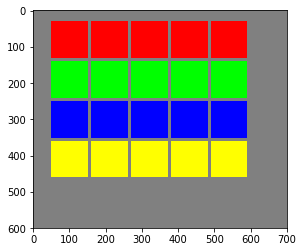

In [167]:

#train_numは訓練データをどれにするか。（クロスバリデーションのため）
#どの周波数を選び、回帰か分類どっちで進めていくか。
train_num = 1
train_x,train_y,test_x,test_y,x_all,y_all = fiveread(train_num)

#print(train_x)
#print(train_y)
#print(test_x)
#print(test_y)
#print(x_all)
#print(y_all)
#train_x, test_x, train_y, test_y  = train_test_split(arr, Y,test_size=0.3,random_state=0) #defaultでtestサイズ0.25

#referenceのカラーコード
#colorcode(test_y)
colorcode(test_y)

Best score: 0.95
Best parameters: {'gamma': 0.001, 'C': 0.001}
比較方法:One-versus-the-rest
Best pred:['0.5mm' '0.5mm' '0.5mm' '0.5mm' '0.5mm' '1.0mm' '1.0mm' '1.0mm' '2.0mm'
 '1.0mm' '1.5mm' '1.5mm' '1.5mm' '1.5mm' '1.5mm' '2.0mm' '2.0mm' '2.0mm'
 '2.0mm' '2.0mm']


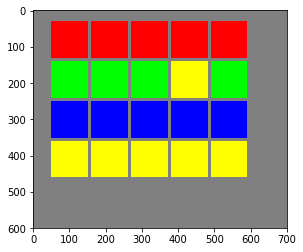

In [168]:
#SVM
best_pred=svm(train_x,train_y,test_x,test_y)
colorcode(best_pred)

k=1,weight=uniform
正答率 = 0.9
k=1,weight=distance
正答率 = 0.9


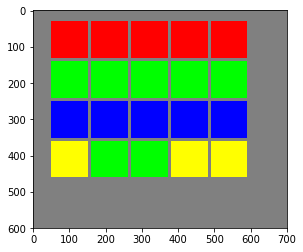

In [169]:
#k近傍法
best_pred=kNN(train_x,train_y,test_x,test_y)
colorcode(best_pred)

各次元の寄与率: [ 0.36734581  0.33828922]
累積寄与率: 0.7056350302527279


/Users/ryoya/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "uppper right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


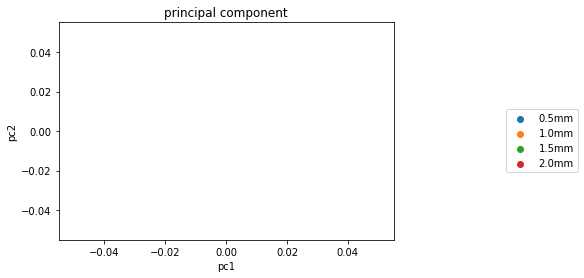

0
[ 0.15578835  0.73930296]
6
[-0.45561609 -0.33914322]
12
[ 0.6644571  -0.21825676]
18
[-0.31833928 -0.29556611]
Best score: 0.8
Best parameters: {'gamma': 0.001, 'C': 0.001}
比較方法:One-versus-one
Best pred:['0.5mm' '0.5mm' '0.5mm' '0.5mm' '0.5mm' '1.0mm' '2.0mm' '2.0mm' '2.0mm'
 '1.0mm' '1.5mm' '1.5mm' '1.5mm' '1.5mm' '1.5mm' '2.0mm' '2.0mm' '1.0mm'
 '2.0mm' '2.0mm']


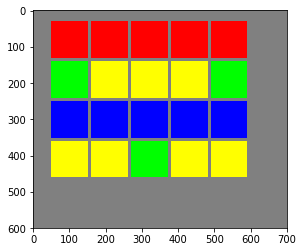

In [170]:
#PCA-SVM
transformed,targets=pCA(x_all,y_all)

train_x_pca = np.empty((0,2), int)
test_x_pca = np.empty((0,2), int)
#print(transformed.shape)
#print(targets)

for i in range(0,24):
    if i ==0 or  i ==6 or i ==12 or i ==18:
        print(i)
        print(transformed[i])
        train_x_pca = np.append(train_x_pca, np.array([transformed[i]]), axis=0)
    else:
        test_x_pca = np.append(test_x_pca, np.array([transformed[i]]), axis=0)
        
#print(train_x_pca)
#print(train_y)
#print(test_x_pca)
#print(test_y)
best_pred=svm(train_x_pca,train_y,test_x_pca,test_y)
colorcode(best_pred)

In [ ]:
#ここからは可視化のためにCとganmaを固定して行っている。
#標準化
sc = StandardScaler()
sc.fit(transformed)
transformed = sc.transform(transformed)
train_x, test_x, train_y, test_y  = train_test_split(transformed, targets,test_size=0.3,random_state=0) #defaultでtestサイズ0.25
print(train_y)
svm = SVC(kernel='rbf', C=1, gamma=1)
plt.figure(figsize=(8,6))

# モデルの学習
svm.fit(train_x, train_y)
# 決定境界をプロット
plot_decision_regions(transformed, targets, svm)
plt.title('svm')
plt.tight_layout()
#plt.savefig('./images/decision_region.png')
plt.show()

RMSE Best score: 0.37223396240568296
Best parameters: {'gamma': 1, 'C': 1}
Best pred:[ 1.03486198  0.6538106   0.71339095  0.99613929  0.7235327   1.15109371
  1.17709162  1.16832594  1.10615036  1.1075924   1.21690449  1.3398922
  1.19612135  1.19778616  1.20674519  1.27149587  1.25851568  1.52559023
  1.77602086  1.46783245]


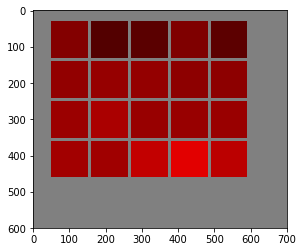

In [132]:
#SVR
best_pred=svr(train_x,train_y,test_x,test_y)
colorcode_regression(best_pred)